In [4]:
#importing module
import pandas as pd

In [5]:
df = pd.read_csv("/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = encoder.fit_transform(df[col])

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X = df[['area', 'bedrooms', 'bathrooms', 'stories',  'parking']].values
y = df['price'].values
z = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']]




In [8]:
X = df.drop('price',axis =1)
Y = df['price']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1,1))

In [11]:
import torch
X_tensor=torch.tensor(X,dtype=torch.float32)
Y_tensor=torch.tensor(Y,dtype=torch.float32).view(-1,1)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(num_features,6),
        nn.Linear(6,1)

    )
  def forward(self,x):
    return self.net(x)

In [16]:
learning_rates=[0.001,0.01,0.1]
shape = X.shape[1]
num_epochs=18
loss_history = {}

for lr in learning_rates:
  print(f"\nTraining with learning rate = (lr)")

  model = ANN(shape)
  criterion = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(),lr=lr)

  result= []
  for ep in range(num_epochs):
    model.train()
    y_preds=model(X_tensor)
    loss = criterion(y_preds, Y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    result.append(loss.item())
    print(f"Epoch {ep+1}/{num_epochs} MSE: {loss.item():.6f}")

  loss_history[lr]=result


Training with learning rate = (lr)
Epoch 1/18 MSE: 1.083913
Epoch 2/18 MSE: 1.081848
Epoch 3/18 MSE: 1.079792
Epoch 4/18 MSE: 1.077743
Epoch 5/18 MSE: 1.075703
Epoch 6/18 MSE: 1.073670
Epoch 7/18 MSE: 1.071645
Epoch 8/18 MSE: 1.069627
Epoch 9/18 MSE: 1.067618
Epoch 10/18 MSE: 1.065616
Epoch 11/18 MSE: 1.063621
Epoch 12/18 MSE: 1.061635
Epoch 13/18 MSE: 1.059655
Epoch 14/18 MSE: 1.057683
Epoch 15/18 MSE: 1.055718
Epoch 16/18 MSE: 1.053761
Epoch 17/18 MSE: 1.051810
Epoch 18/18 MSE: 1.049867

Training with learning rate = (lr)
Epoch 1/18 MSE: 1.357406
Epoch 2/18 MSE: 1.299251
Epoch 3/18 MSE: 1.246080
Epoch 4/18 MSE: 1.197209
Epoch 5/18 MSE: 1.152073
Epoch 6/18 MSE: 1.110201
Epoch 7/18 MSE: 1.071200
Epoch 8/18 MSE: 1.034736
Epoch 9/18 MSE: 1.000530
Epoch 10/18 MSE: 0.968343
Epoch 11/18 MSE: 0.937974
Epoch 12/18 MSE: 0.909248
Epoch 13/18 MSE: 0.882018
Epoch 14/18 MSE: 0.856158
Epoch 15/18 MSE: 0.831558
Epoch 16/18 MSE: 0.808123
Epoch 17/18 MSE: 0.785774
Epoch 18/18 MSE: 0.764438

Training 

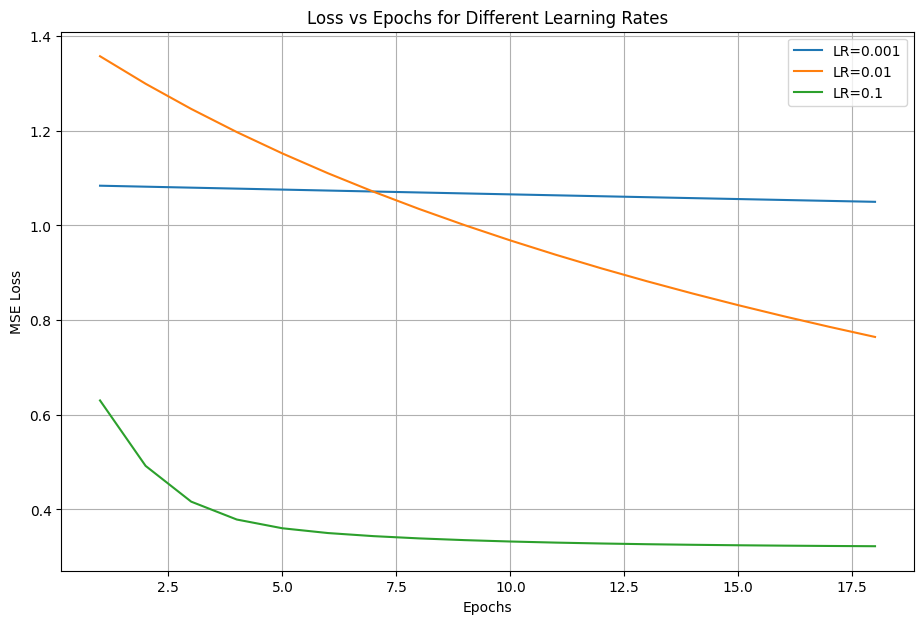

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
for lr, losses in loss_history.items():
  plt.plot(range(1, num_epochs+1), losses, label=f"LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

